In [125]:
import pandas as pd
import numpy as np
import plotly.express as px

In [240]:
#State conversion
estados = {'AC':'Acre', 'AL':'Alagoas', 'AP':'Amapá', 'AM':'Amazonas', 'BA':'Bahia', 'CE':'Ceará', 'DF':'Distrito Federal',
           'ES':'Espírito Santo', 'GO':'Goiás', 'MA':'Maranhão', 'MT':'Mato Grosso', 'MS':'Mato Grosso do Sul', 'MG':'Minas Gerais',
           'PA':'Pará', 'PB':'Paraíba', 'PR':'Paraná', 'PE':'Pernambuco', 'PI':'Teresina', 'RJ':'Rio de Janeiro','RN':'Rio Grande do Norte',
           'RS':'Rio Grande do Sul', 'RO':'Rondônia', 'RR':'Roraima', 'SC':'Santa Catarina', 'SP':'São Paulo', 'SE':'Sergipe', 'TO':'Tocantins'}

#Purchase type
tipos=['CLIENTE NOVO','RECOMPRA']
cores_vendedor = {'CLIENTE NOVO':'rgb(8,76,44)',
                                 'RECOMPRA':'rgb(132,156,132)'}

In [127]:
df = pd.read_excel('Sales_report.xlsx')

In [128]:
df.columns

Index(['Nº CPF/CNPJ Cliente', 'Cliente', 'Pedido', 'Status', 'Vendedor',
       'Cond. Pgto.', 'Data NFe', 'Nota Fiscal', 'Nº Ped. Cliente',
       'Data emissão', 'Data entrega', 'Ordem Item', 'Código', 'Descrição',
       'Cor/Espec./Tam.', 'UF', 'Cidade', 'Bairro', 'Complemento', 'Endereço',
       'Número', 'Unid.', 'Linha', 'Sub-Linha', 'Qtde.', 'Vl. Unitário',
       'Desconto', 'Vl. Total', 'Observações', 'Obs. Itens', 'Peso Bruto',
       'Peso Líquido', 'Chave Acesso'],
      dtype='object')

In [129]:
df.drop(['Nº CPF/CNPJ Cliente', 'Pedido', 'Status', 'Cliente','Bairro', 'Complemento', 'Endereço',
         'Número', 'Cond. Pgto.', 'Data NFe', 'Nota Fiscal', 'Nº Ped. Cliente','Chave Acesso'],axis=1, inplace=True)

In [130]:
df.dtypes

Vendedor                   object
Data emissão       datetime64[ns]
Data entrega       datetime64[ns]
Ordem Item                  int64
Código                     object
Descrição                  object
Cor/Espec./Tam.           float64
UF                         object
Cidade                     object
Unid.                      object
Linha                      object
Sub-Linha                  object
Qtde.                       int64
Vl. Unitário              float64
Desconto                  float64
Vl. Total                 float64
Observações               float64
Obs. Itens                 object
Peso Bruto                float64
Peso Líquido              float64
dtype: object

In [131]:
df = df.rename(columns={'Data emissão': 'Data', 'Qtde.':'Quantidade', 'UF':'Estado', 'Vl. Total': 'Total'})

In [132]:
df['Estado'] = df['Estado'].apply(lambda x: estados[x])

In [133]:
vds_por_est = pd.DataFrame(df, columns=['Estado','Total'])
vds_por_est = vds_por_est.groupby('Estado').sum()
# verificar como plotar o mapa do Brasil

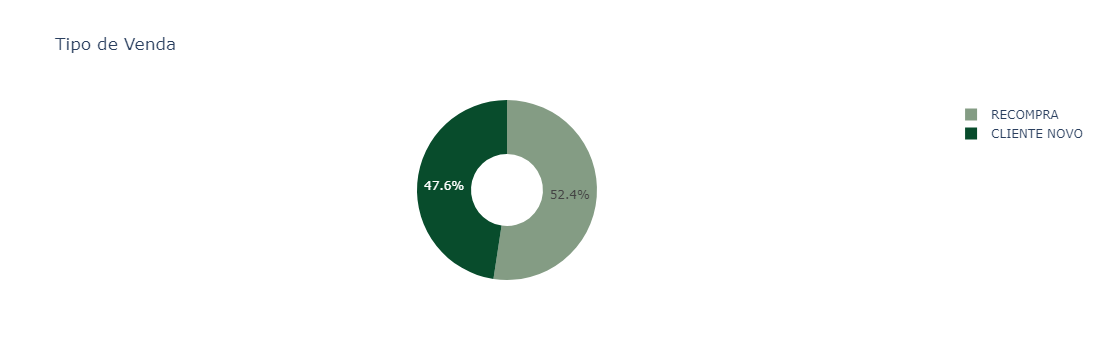

In [241]:
fig = px.pie(df[df['Vendedor'].isin(tipos)], values='Total', names='Vendedor', title='Tipo de Venda', 
             hole=.4, color='Vendedor', color_discrete_map=cores_vendedor )
fig.show()

In [212]:
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Período'] = df['Mês'].astype(str) + '-' + df['Ano'].astype(str)
df['Período'] = pd.to_datetime(df['Período'], format='%m-%Y')
df.head()

,Vendedor,Data,Data entrega,Ordem Item,Código,Descrição,Cor/Espec./Tam.,Estado,Cidade,Unid.,...,Vl. Unitário,Desconto,Total,Observações,Obs. Itens,Peso Bruto,Peso Líquido,Ano,Mês,Período
0,BOCCHI SUPRIMENTOS,2023-01-11,2023-01-11,1,LP0190008,"ESTUFA CRISTAL LONAX 2,2 X 105 28 KG REF: 150",NaN,Tocantins,ARAGUAINA,BOBINA,...,1183.000,0.00,1183.00,NaN,NaN,28.0,0.0,2023,1,2023-01-01
1,BOCCHI SUPRIMENTOS,2023-01-11,2023-01-11,1,LP0010003,LONA PRETA 4 X 100 10 KG REF: 30,NaN,São Paulo,SAO JOSE DO RIO PRETO,BOBINA,...,157.001,0.00,314.00,NaN,NaN,20.0,0.0,2023,1,2023-01-01
2,BOCCHI SUPRIMENTOS,2023-01-11,2023-01-11,1,LP0020001,LONA BRANCA 4 X 100 25 KG REF: 100,NaN,São Paulo,SAO PAULO,BOBINA,...,518.830,0.00,2594.15,NaN,NaN,125.0,0.0,2023,1,2023-01-01
3,BOCCHI SUPRIMENTOS,2023-01-18,2023-01-18,1,LP0190008,"ESTUFA CRISTAL LONAX 2,2 X 105 28 KG REF: 150",NaN,Minas Gerais,SAO SEBASTIAO DO PARAISO,BOBINA,...,951.720,19.03,932.69,NaN,NaN,28.0,0.0,2023,1,2023-01-01
4,BOCCHI SUPRIMENTOS,2023-03-15,2023-03-15,1,LP0020001,LONA BRANCA 4 X 100 25 KG REF: 100,NaN,São Paulo,MAUA,BOBINA,...,490.000,0.00,980.00,NaN,NaN,50.0,0.0,2023,3,2023-03-01


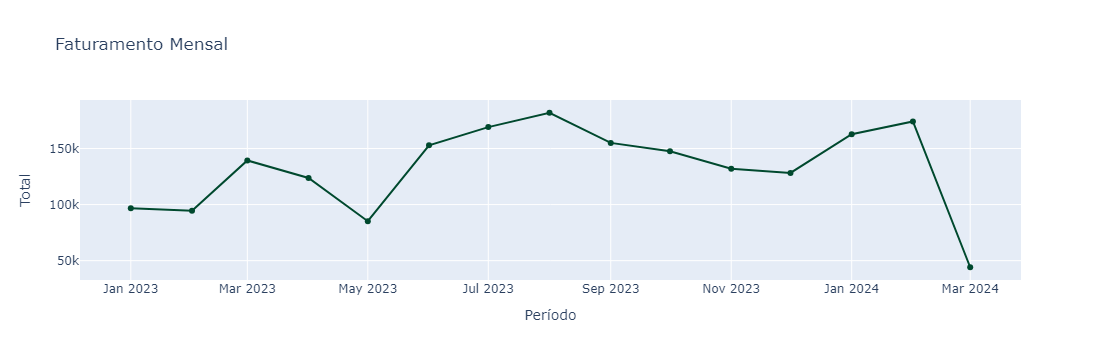

In [239]:
fat = pd.pivot_table(df, values='Total', index='Período', columns=None, aggfunc='sum')
fig = px.line(fat, x=fat.index, y='Total', title='Faturamento Mensal', markers=True)
fig.update_traces(line_color='rgb(0,73,46)')
#fig.update_layout(plot_bgcolor='rgb(132,156,132)')
fig.show()

In [244]:
por_linha = pd.pivot_table(df, values='Total', index='Período', columns='Linha', aggfunc='sum').fillna(0)

In [245]:
por_linha.head()

Linha,CORDAS,EMBALAGENS,ESPAÇADORES,FIOS E CABOS,LONAS PLASTICAS,PROTETORES,SEM CONTROLE POR LINHA
Período,,,,,,,
2023-01-01,3149.00,0.0,0.00,0.0,93582.96,0.00,0.0
2023-02-01,4343.75,0.0,408.36,0.0,89843.68,0.00,0.0
2023-03-01,2693.78,0.0,385.00,0.0,134236.78,649.01,1423.9
2023-04-01,2070.20,0.0,284.20,0.0,118152.09,3245.03,0.0
2023-05-01,2757.10,0.0,255.00,50.0,79928.66,1399.30,812.0


In [246]:
por_linha.columns

Index(['CORDAS', 'EMBALAGENS', 'ESPAÇADORES', 'FIOS E CABOS',
       'LONAS PLASTICAS', 'PROTETORES', 'SEM CONTROLE POR LINHA'],
      dtype='object', name='Linha')

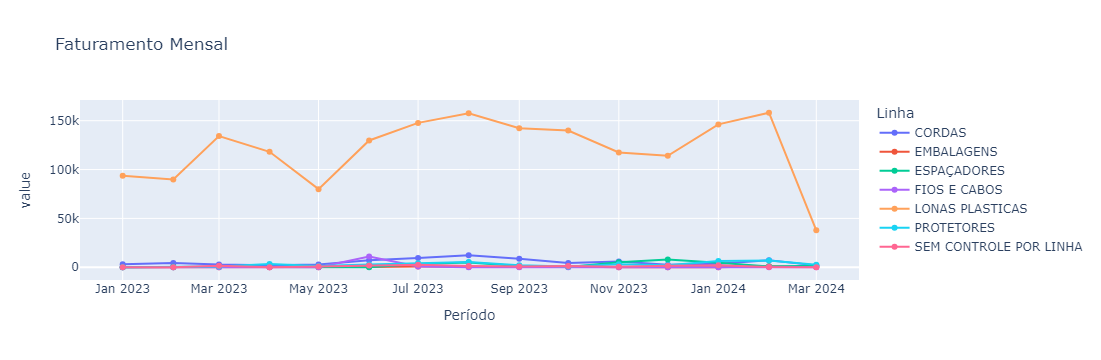

In [250]:
fig = px.line(por_linha, x=por_linha.index, y=por_linha.columns, title='Faturamento Mensal', markers=True)
#fig.update_layout(plot_bgcolor='rgb(132,156,132)')
fig.show()